In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
task = "acronym"

df = pd.read_csv(f"{task}_results.csv")
df.columns = ["Ablation Scheme", "Include MLPs", "Threshold", "Accuracy", "Size", "Num. Heads", "Num. MLP"]
df["Size (%)"] = (df["Size"].max() - df["Size"]) / df["Size"].max() * 100
df

,Ablation Scheme,Include MLPs,Threshold,Accuracy,Size,Num. Heads,Num. MLP,Size (%)
0,mean,False,0.000010,0.930,84859200,143,12,0.231377
1,mean,False,0.000018,0.930,84465600,141,12,0.694131
2,mean,False,0.000034,0.930,84268800,140,12,0.925508
3,mean,False,0.000062,0.930,83678400,137,12,1.619639
4,mean,False,0.000113,0.925,81907200,128,12,3.702032
...,...,...,...,...,...,...,...,...
75,zero,True,0.088587,0.480,56114112,21,11,34.026862
76,zero,True,0.162378,0.010,50406144,16,10,40.737698
77,zero,True,0.297635,0.000,40367808,13,8,52.539729
78,zero,True,0.545559,0.000,28544448,1,6,66.440406


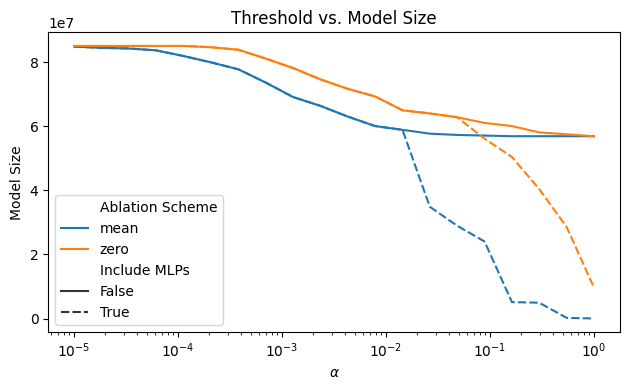

In [65]:
plt.figure(figsize=(1.6*4, 4))
ax = sns.lineplot(df, x="Threshold", y="Size", 
                  hue="Ablation Scheme", style="Include MLPs")
ax.set_xscale("log")
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel("Model Size")
ax.set_title("Threshold vs. Model Size")
plt.tight_layout()
plt.savefig(f"images/{task}_alpha_size.pdf")

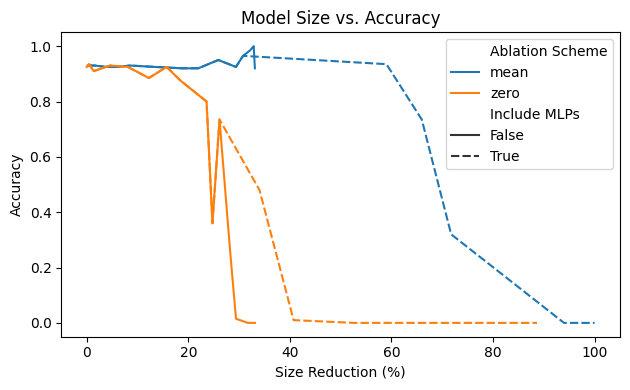

In [66]:
plt.figure(figsize=(1.6*4, 4))
ax = sns.lineplot(df, x="Size (%)", y="Accuracy", hue="Ablation Scheme", style="Include MLPs")
ax.set_title("Model Size vs. Accuracy")
ax.set_xlabel("Size Reduction (%)")
plt.tight_layout()
plt.savefig(f"images/{task}_size_acc.pdf")